In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
train = pd.read_csv('/home/shaury/Desktop/pvsc/genome-hackerearth/dataset/train.csv',sep=',',na_values="nan")
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
test= pd.read_csv('/home/shaury/Desktop/pvsc/genome-hackerearth/dataset/test.csv')
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,38,61,St. Elizabeth's Hospital,"30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....",Alive,Tachypnea,Normal,0,-99,0,1,0,-99,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,33,53,-99,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",Alive,NaN,-99,0,0,-99,1,-99,Yes,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,48,60,NaN,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",Deceased,NaN,Normal,0,0,0,1,0,-99,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,25,55,Boston Specialty & Rehabilitation Hospital,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,-99,0,0,0,1,0,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,41,38,Not applicable,-,Deceased,Tachypnea,NaN,0,0,0,1,0,Yes,Low,Ambiguous,No,None,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.195178,normal,True,True,True,True,False


9465 22083
AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


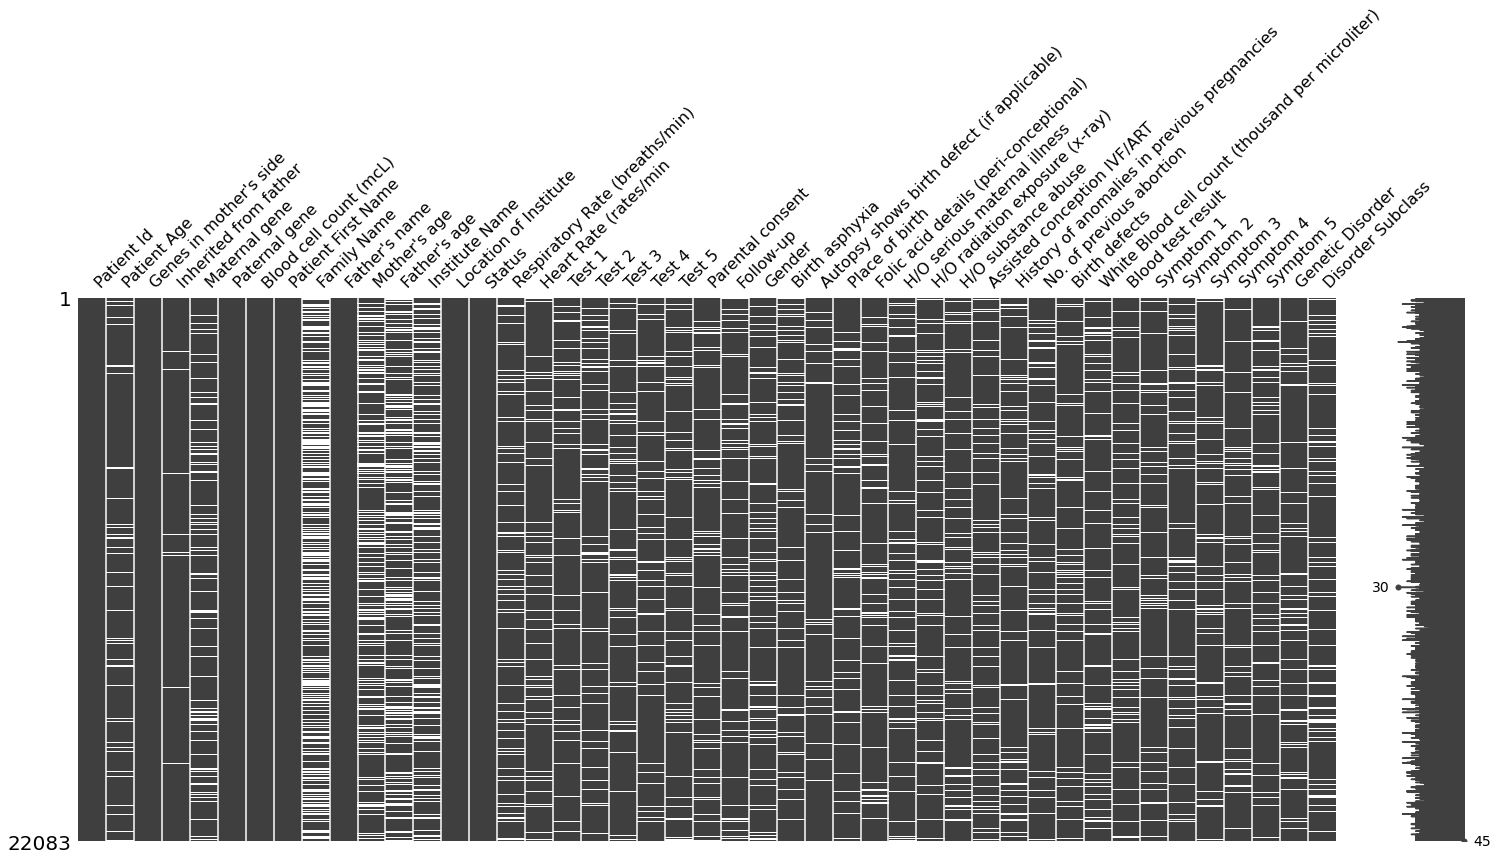

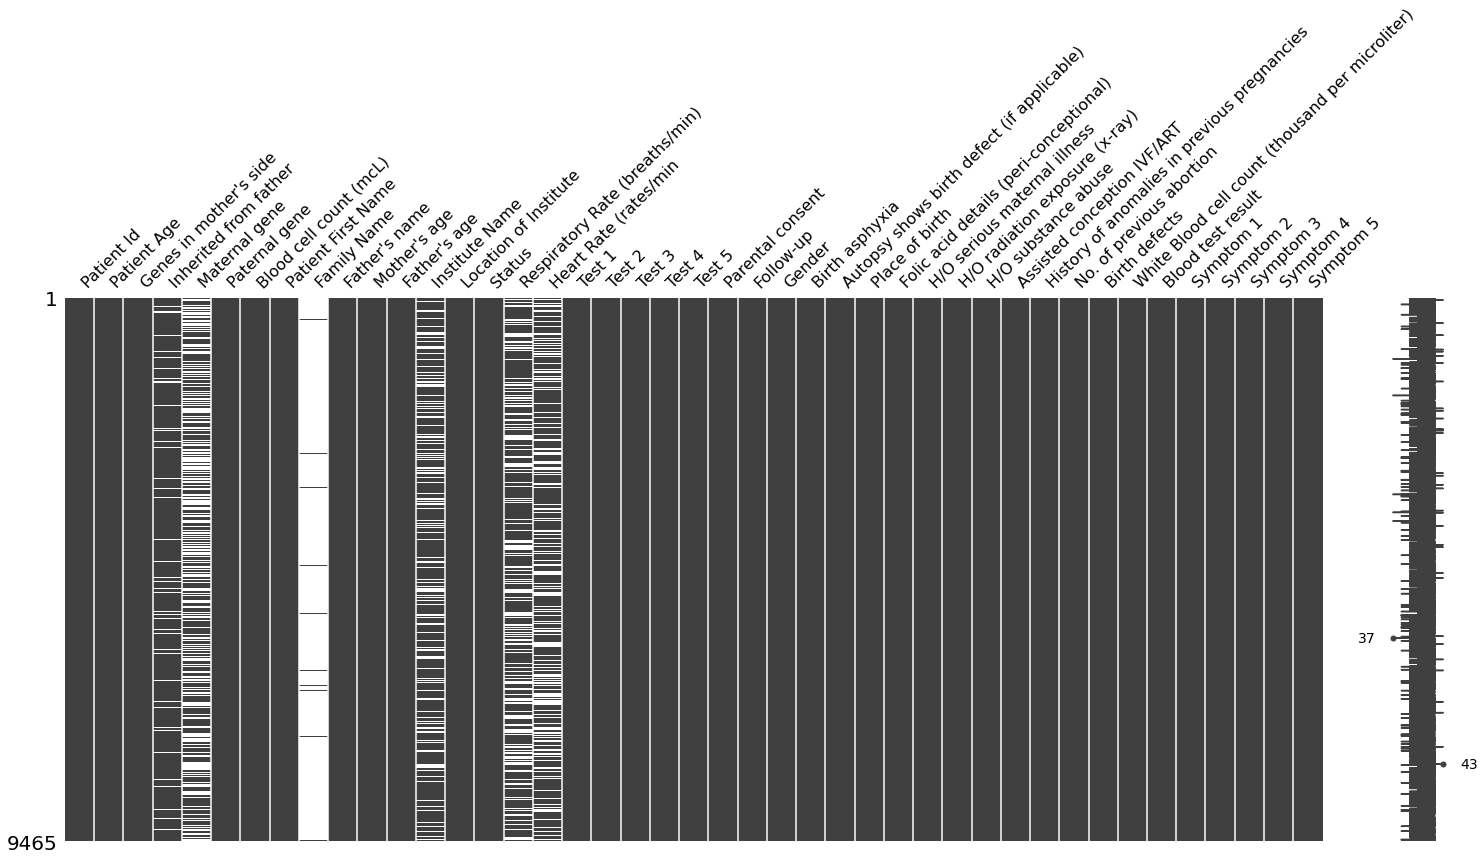

In [5]:
import missingno as ms
print(len(test),len(train))
print(ms.matrix(train))
print(ms.matrix(test))

In [6]:
train.drop(['Inherited from father','Maternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min'],axis=1,inplace=True)
test.drop(['Inherited from father','Maternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min'],axis=1,inplace=True)

In [7]:
for i in train.columns:
    if(i not in test.columns):
        print(i)

Genetic Disorder
Disorder Subclass


In [8]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [9]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,No,4.981655,Charles,NaN,Kore,38,61,St. Elizabeth's Hospital,"30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....",Alive,0,-99,0,1,0,-99,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,Yes,5.118890,Catherine,NaN,Homero,33,53,-99,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",Alive,0,0,-99,1,-99,Yes,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,No,4.876204,James,NaN,Danield,48,60,NaN,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",Deceased,0,0,0,1,0,-99,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,No,4.687767,Brian,NaN,Orville,25,55,Boston Specialty & Rehabilitation Hospital,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,0,0,0,1,0,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,Yes,5.152362,Gary,NaN,Issiah,41,38,Not applicable,-,Deceased,0,0,0,1,0,Yes,Low,Ambiguous,No,None,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [10]:
### removing the unneccessary columns :
train.drop(['Patient Id','Patient First Name','Family Name',"Father's name"
            ,"Institute Name",'Location of Institute','Parental consent','Place of birth'],axis=1,inplace=True)
test.drop(['Patient Id','Patient First Name','Family Name',"Father's name"
            ,"Institute Name",'Location of Institute','Parental consent','Place of birth'],axis=1,inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Paternal gene                                     22083 non-null  object 
 3   Blood cell count (mcL)                            22083 non-null  float64
 4   Mother's age                                      16047 non-null  float64
 5   Father's age                                      16097 non-null  float64
 6   Status                                            22083 non-null  object 
 7   Test 1                                            19956 non-null  float64
 8   Test 2                                            19931 non-null  float64
 9   Test 3           

In [12]:
a = []
for i in train.columns:
    if(type(train[i][0])==str):
        a.append(i)
a

["Genes in mother's side",
 'Paternal gene',
 'Status',
 'Follow-up',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Genetic Disorder',
 'Disorder Subclass']

In [13]:
train[a].head(2)

,Genes in mother's side,Paternal gene,Status,Follow-up,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Genetic Disorder,Disorder Subclass
0,Yes,No,Alive,High,Not applicable,No,No,No,No,Yes,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,Yes,No,Deceased,High,None,Yes,Not applicable,Not applicable,No,Yes,NaN,Cystic fibrosis


In [14]:
def onezero(x):
    if(type(x)==str):
        return 1 if x.lower() == 'yes' else 0
    else:
        return x

In [15]:
train['Genes in mother\'s side'] = train['Genes in mother\'s side'].map(onezero)
train['Paternal gene'] = train['Paternal gene'].map(onezero)
test['Genes in mother\'s side'] = test['Genes in mother\'s side'].map(onezero)
test['Paternal gene'] = test['Paternal gene'].map(onezero)

In [16]:
train.head(2)

,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,4.760603,NaN,NaN,Alive,0.0,NaN,NaN,1.0,0.0,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,1,0,4.910669,NaN,23.0,Deceased,NaN,0.0,0.0,1.0,0.0,High,NaN,No,None,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis


In [17]:
train.Status.unique()

array(['Alive', 'Deceased'], dtype=object)

In [18]:
def alive(x):
    if(x=='Alive'):
        return 1
    elif(x=='Deceased'):
        return 0
train['Status'] = train['Status'].map(alive)
test['Status'] = test['Status'].map(alive)

In [19]:
train[['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']]=train[['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']].astype('bool')

### median imputation of parents age

In [20]:
train['Patient Age'].unique()

array([ 2.,  4.,  6., 12., 11., 14.,  3.,  7.,  1.,  0., nan, 10.,  5.,
       13.,  8.,  9.])

In [21]:
agepatient = [ 2.,  4.,  6., 12., 11., 14.,  3.,  7.,  1.,  0., 10.,  5., 13.,  8.,  9.]

In [22]:
for i in agepatient:
        train.loc[(train['Patient Age']==i) & (train['Father\'s age'].isna()),"Father's age"] = train[train['Patient Age']==i]['Father\'s age'].median(skipna=True)

In [23]:
for i in agepatient:
        train.loc[(train['Patient Age']==i) & (train['Mother\'s age'].isna()),"Mother's age"] = train[train['Patient Age']==i]['Mother\'s age'].median(skipna=True)

In [24]:
train['Father\'s age'].unique()

array([42., 23., 22., 41., 63., 44., 43., 56., 20., 24., 57., 48., 30.,
       nan, 55., 62., 32., 52., 28., 31., 61., 35., 49., 50., 29., 64.,
       39., 34., 51., 25., 60., 53., 58., 26., 27., 59., 47., 38., 54.,
       21., 37., 36., 33., 46., 40., 45.])

In [25]:
agefather = [42., 23., 22., 41., 63., 44., 43., 56., 20., 24., 57., 48., 30., 55., 62., 32., 52., 28., 31., 61., 35., 49., 50., 29., 64.,
       39., 34., 51., 25., 60., 53., 58., 26., 27., 59., 47., 38., 54.,
       21., 37., 36., 33., 46., 40., 45.]

In [26]:
for i in agefather:
    train.loc[(train['Father\'s age']==i) & (train['Patient Age'].isna()),"Patient Age"] = train[train['Father\'s age']==i]['Patient Age'].median(skipna=True)

In [27]:
train['Mother\'s age'].unique()

array([34., 35., 41., 21., 32., 40., 45., 44., 50., 28., 30., 24., 36.,
       nan, 51., 23., 49., 46., 18., 38., 37., 42., 48., 25., 19., 47.,
       22., 33., 20., 26., 31., 29., 27., 43., 39.])

In [28]:
agemother = [34., 35., 41., 21., 32., 40., 45., 44., 50., 28., 30., 24., 36.,51., 23., 49., 46., 18., 38., 37., 42., 48., 25., 19., 47.,
       22., 33., 20., 26., 31., 29., 27., 43., 39.]

In [29]:
for i in agemother:
    train.loc[(train['Mother\'s age']==i) & (train['Patient Age'].isna()),"Patient Age"] = train[train['Mother\'s age']==i]['Patient Age'].median(skipna=True)

In [30]:
train['Patient Age'].unique()

array([ 2. ,  4. ,  6. , 12. , 11. , 14. ,  3. ,  7. ,  1. ,  0. , 10. ,
        nan,  5. , 13. ,  8. ,  9. ,  7.5])

In [31]:
agepatient = [ 2. ,  4. ,  6. , 12. , 11. , 14. ,  3. ,  7. ,  1. ,  0. , 10. , 5. , 13. ,  8. ,  9. ,  7.5]

for i in agepatient:
        train.loc[(train['Patient Age']==i) & (train['Father\'s age'].isna()),"Father's age"] = train[train['Patient Age']==i]['Father\'s age'].median(skipna=True)

for i in agepatient:
        train.loc[(train['Patient Age']==i) & (train['Mother\'s age'].isna()),"Mother's age"] = train[train['Patient Age']==i]['Mother\'s age'].median(skipna=True)

<AxesSubplot:>

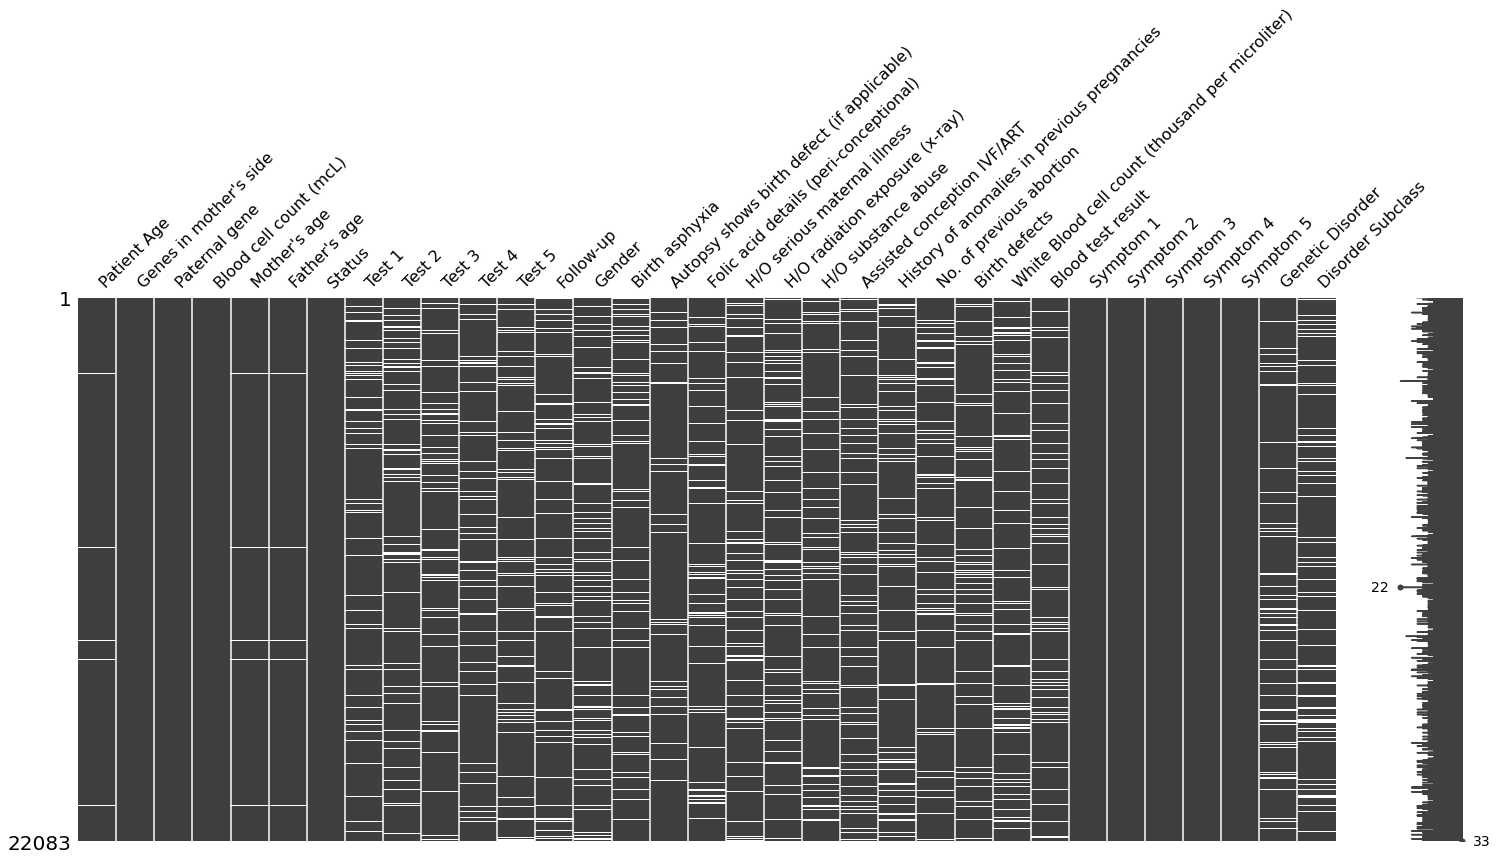

In [32]:
ms.matrix(train)

In [33]:
a = []
for i in train.columns:
    if(type(train[i][0])==str):
        a.append(i)
a

['Follow-up',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Genetic Disorder',
 'Disorder Subclass']

In [34]:
train[a].head(2)

,Follow-up,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Genetic Disorder,Disorder Subclass
0,High,Not applicable,No,No,No,No,Yes,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,High,None,Yes,Not applicable,Not applicable,No,Yes,NaN,Cystic fibrosis


In [35]:
train['Follow-up'].unique()

array(['High', 'Low', nan], dtype=object)

In [36]:
def followup(x):
    if(type(x)==str):
        return 1 if x=='High' else 0
    else:
        return x
train['Follow-up']=train['Follow-up'].map(followup)
test['Follow-up']=test['Follow-up'].map(followup)

In [37]:
train['Autopsy shows birth defect (if applicable)'].unique()

array(['Not applicable', 'None', 'No', 'Yes', nan], dtype=object)

<AxesSubplot:xlabel='Autopsy shows birth defect (if applicable)', ylabel='count'>

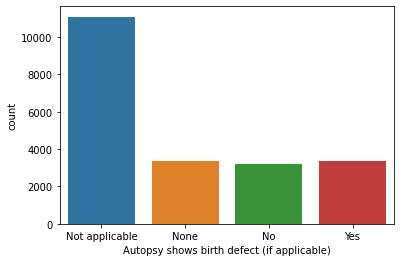

In [38]:
sns.countplot(x=train['Autopsy shows birth defect (if applicable)'])

In [39]:
train['Autopsy shows birth defect (if applicable)'].replace("Not applicable","None",inplace=True)
train['Autopsy shows birth defect (if applicable)'].value_counts()

None    14449
Yes      3383
No       3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [40]:
def aut(x):
    if(type(x)==str):
        if(x.lower()=='yes'):
            return 1
        elif(x.lower()=='no'):
            return 0
        elif(x.lower()=='none'):
            return 2
    else:
        return x
train['Autopsy shows birth defect (if applicable)'].map(aut).value_counts()

2.0    14449
1.0     3383
0.0     3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [41]:
train['Autopsy shows birth defect (if applicable)']=train['Autopsy shows birth defect (if applicable)'].map(aut)
test['Autopsy shows birth defect (if applicable)']=test['Autopsy shows birth defect (if applicable)'].map(aut)

In [42]:
train['Folic acid details (peri-conceptional)'].unique()

array(['No', 'Yes', nan], dtype=object)

In [43]:
train['Folic acid details (peri-conceptional)']=train['Folic acid details (peri-conceptional)'].map(onezero)
test['Folic acid details (peri-conceptional)']=test['Folic acid details (peri-conceptional)'].map(onezero)

In [44]:
train['H/O radiation exposure (x-ray)'].unique()

array(['No', 'Not applicable', 'Yes', '-', nan], dtype=object)

In [45]:
test['H/O radiation exposure (x-ray)'].unique()

array(['Yes', '-99', '-', 'Not applicable', 'No'], dtype=object)

In [46]:
train['H/O radiation exposure (x-ray)'].replace(["Not applicable","-99"],"-",inplace=True)

In [47]:
test['H/O radiation exposure (x-ray)'].replace(["Not applicable","-99"],"-",inplace=True)

In [48]:
def ho(x):
    if(x=='Yes'):
        return 1
    elif(x=='No'):
        return 0
    elif(x=='-'):
        return 2
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].map(ho)
test['H/O radiation exposure (x-ray)'] = test['H/O radiation exposure (x-ray)'].map(ho)

In [49]:
train['H/O serious maternal illness'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [50]:
def ivf(x):
    if(x=='Yes'):
        return 1
    elif(x=='No'):
        return 0
    else:
        return 2
train['Assisted conception IVF/ART']=train['Assisted conception IVF/ART'].map(ivf)
test['Assisted conception IVF/ART']=test['Assisted conception IVF/ART'].map(ivf)

In [51]:
train['History of anomalies in previous pregnancies'].unique()

array(['Yes', 'No', nan], dtype=object)

In [52]:
test['History of anomalies in previous pregnancies'].unique()

array(['-99', 'Yes', 'No'], dtype=object)

In [53]:
train['History of anomalies in previous pregnancies']=train['History of anomalies in previous pregnancies'].map(ivf)
test['History of anomalies in previous pregnancies']=test['History of anomalies in previous pregnancies'].map(ivf)

In [54]:
train['H/O substance abuse'].unique()

array(['No', 'Not applicable', nan, '-', 'Yes'], dtype=object)

In [55]:
test['H/O substance abuse'].unique()

array(['-', '-99', 'Yes', 'Not applicable', 'No'], dtype=object)

<AxesSubplot:xlabel='H/O substance abuse', ylabel='count'>

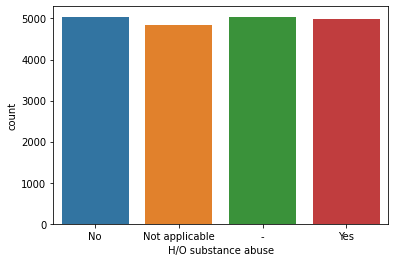

In [56]:
sns.countplot(x=train['H/O substance abuse'])

In [57]:
train['H/O substance abuse'].replace(['Not applicable','-99'],'-',inplace=True)
test['H/O substance abuse'].replace(['Not applicable','-99'],'-',inplace=True)

<AxesSubplot:xlabel='H/O substance abuse', ylabel='count'>

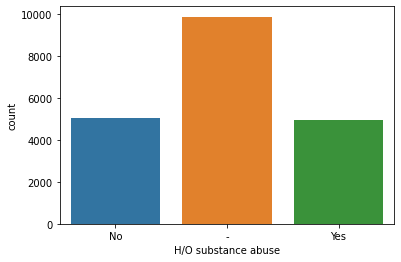

In [58]:
sns.countplot(x=train['H/O substance abuse'])

<AxesSubplot:xlabel='H/O substance abuse', ylabel='count'>

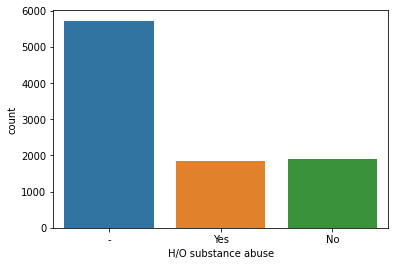

In [59]:
sns.countplot(x=test['H/O substance abuse'])

In [60]:
train[a].head(2)

,Follow-up,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Genetic Disorder,Disorder Subclass
0,1.0,2.0,0.0,0.0,No,0,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,1.0,2.0,1.0,2.0,-,0,1,NaN,Cystic fibrosis


In [61]:
train['H/O substance abuse']=train['H/O substance abuse'].map(ivf)
test['H/O substance abuse'] = test['H/O substance abuse'].map(ivf)

In [62]:
train.loc[(train['Symptom 2'].isna()),'Symptom 2'] = train[(train['Symptom 2'].isna())]['Symptom 1']
train.loc[(train['Symptom 3'].isna()),'Symptom 3'] = train[(train['Symptom 3'].isna())]['Symptom 2']
train.loc[(train['Symptom 4'].isna()),'Symptom 4'] = train[(train['Symptom 4'].isna())]['Symptom 3']
train.loc[(train['Symptom 5'].isna()),'Symptom 5'] = train[(train['Symptom 5'].isna())]['Symptom 4']
train.loc[(train['Symptom 1'].isna()),'Symptom 1'] = train[(train['Symptom 1'].isna())]['Symptom 2']
train.loc[(train['Symptom 2'].isna()),'Symptom 2'] = train[(train['Symptom 2'].isna())]['Symptom 3']
train.loc[(train['Symptom 3'].isna()),'Symptom 3'] = train[(train['Symptom 3'].isna())]['Symptom 4']
train.loc[(train['Symptom 4'].isna()),'Symptom 4'] = train[(train['Symptom 4'].isna())]['Symptom 5']

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       21871 non-null  float64
 1   Genes in mother's side                            22083 non-null  int64  
 2   Paternal gene                                     22083 non-null  int64  
 3   Blood cell count (mcL)                            22083 non-null  float64
 4   Mother's age                                      21871 non-null  float64
 5   Father's age                                      21871 non-null  float64
 6   Status                                            22083 non-null  int64  
 7   Test 1                                            19956 non-null  float64
 8   Test 2                                            19931 non-null  float64
 9   Test 3           

### imputing the white blood reports through blood cell count/mcl 

for males 4.35-5.65
for females 3.92-5.13

In [64]:
train[train['Blood cell count (mcL)'].isna()]

,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass


people with normal blood cell count generally tend to have good white blood cell count , which is 4k or above hence we can impute 7.5(avg of range 4k and 11k) for normal and 3.5 for abnormal

In [65]:
train[train['White Blood cell count (thousand per microliter)'].isna()]

,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
2,6.0,1,0,4.893297,41.0,22.0,1,0.0,0.0,0.0,1.0,0.0,0.0,NaN,No record,2.0,1.0,No,1.0,2,1,1,4.0,Singular,NaN,normal,False,True,True,True,True,Multifactorial genetic inheritance disorders,Diabetes
15,0.0,0,0,4.918570,30.0,24.0,1,0.0,0.0,0.0,NaN,0.0,1.0,Female,NaN,2.0,1.0,NaN,2.0,2,2,1,2.0,Multiple,NaN,normal,False,True,False,True,True,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
16,0.0,1,0,4.798520,34.0,57.0,1,0.0,NaN,0.0,1.0,0.0,0.0,Ambiguous,Not available,2.0,1.0,No,2.0,2,0,1,4.0,Multiple,NaN,normal,True,True,True,True,True,Single-gene inheritance diseases,Cystic fibrosis
25,13.0,1,0,4.854488,34.0,43.0,0,0.0,0.0,0.0,1.0,0.0,0.0,Female,Yes,1.0,1.0,No,0.0,2,1,1,2.0,Singular,NaN,slightly abnormal,False,True,False,False,False,Single-gene inheritance diseases,NaN
30,11.0,1,1,4.839044,46.0,42.0,1,0.0,0.0,0.0,1.0,0.0,0.0,Male,Yes,2.0,1.0,Yes,NaN,1,0,0,4.0,Multiple,NaN,abnormal,False,True,False,False,False,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22051,7.0,1,1,4.664764,42.0,30.0,0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,Not available,0.0,0.0,NaN,0.0,0,2,2,4.0,Singular,NaN,normal,False,False,False,False,False,NaN,Tay-Sachs
22055,1.0,0,0,4.516767,35.0,42.0,0,0.0,0.0,NaN,NaN,0.0,0.0,Male,Yes,1.0,NaN,No,0.0,2,1,1,2.0,Multiple,NaN,slightly abnormal,True,True,False,False,True,NaN,Tay-Sachs
22067,0.0,1,1,4.839422,42.0,43.0,0,0.0,0.0,0.0,NaN,0.0,0.0,Male,No,2.0,1.0,No,NaN,2,0,0,0.0,Multiple,NaN,inconclusive,True,False,True,False,False,Single-gene inheritance diseases,Tay-Sachs
22073,13.0,1,1,4.874635,44.0,62.0,1,0.0,NaN,0.0,1.0,0.0,NaN,NaN,No record,2.0,0.0,NaN,0.0,0,1,0,1.0,NaN,NaN,normal,False,False,False,True,True,NaN,Leigh syndrome


In [66]:
train.loc[(train['White Blood cell count (thousand per microliter)'].isna()) &
          (train['Blood cell count (mcL)']>4),'White Blood cell count (thousand per microliter)'] = 7.75

In [67]:
def gender(x):
    if(x=='Male'):
        return 0
    elif(x=='Female'):
        return 1
    else:
        return 2

In [68]:
train['Gender'] = train['Gender'].map(gender)
test['Gender'] = test['Gender'].map(gender)

In [69]:
train['Birth asphyxia'].unique()

array([nan, 'No', 'No record', 'Not available', 'Yes'], dtype=object)

In [70]:
test['Birth asphyxia'].unique()

array(['Yes', 'Not available', 'No', 'No record', '-99'], dtype=object)

In [71]:
test['Birth asphyxia'].replace(['Not available','No record','-99'],'none',inplace=True)
train['Birth asphyxia'].replace(['Not available','No record','-99'],'none',inplace=True)

In [72]:
test['Birth asphyxia'].unique()

array(['Yes', 'none', 'No'], dtype=object)

In [73]:
def asp(x):
    if(x=='Yes'):
        return 1
    elif(x=='No'):
        return 0
    else:
        return 2

In [74]:
train['Birth asphyxia'] = train['Birth asphyxia'].map(asp)
test['Birth asphyxia'] = test['Birth asphyxia'].map(asp)

In [75]:
train['Birth defects'].unique()

array([nan, 'Multiple', 'Singular'], dtype=object)

In [76]:
test['Birth defects'].unique()

array(['Multiple', 'Singular', '-99'], dtype=object)

<AxesSubplot:xlabel='Birth defects', ylabel='count'>

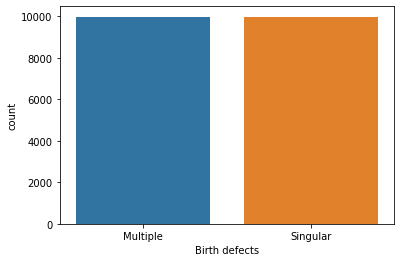

In [77]:
sns.countplot(x=train['Birth defects'])

In [78]:
train['Birth defects'] = train['Birth defects'].map(lambda x: 1 if x=='Multiple' else 0)
test['Birth defects'] = test['Birth defects'].map(lambda x: 1 if x=='Multiple' else 0)

<AxesSubplot:>

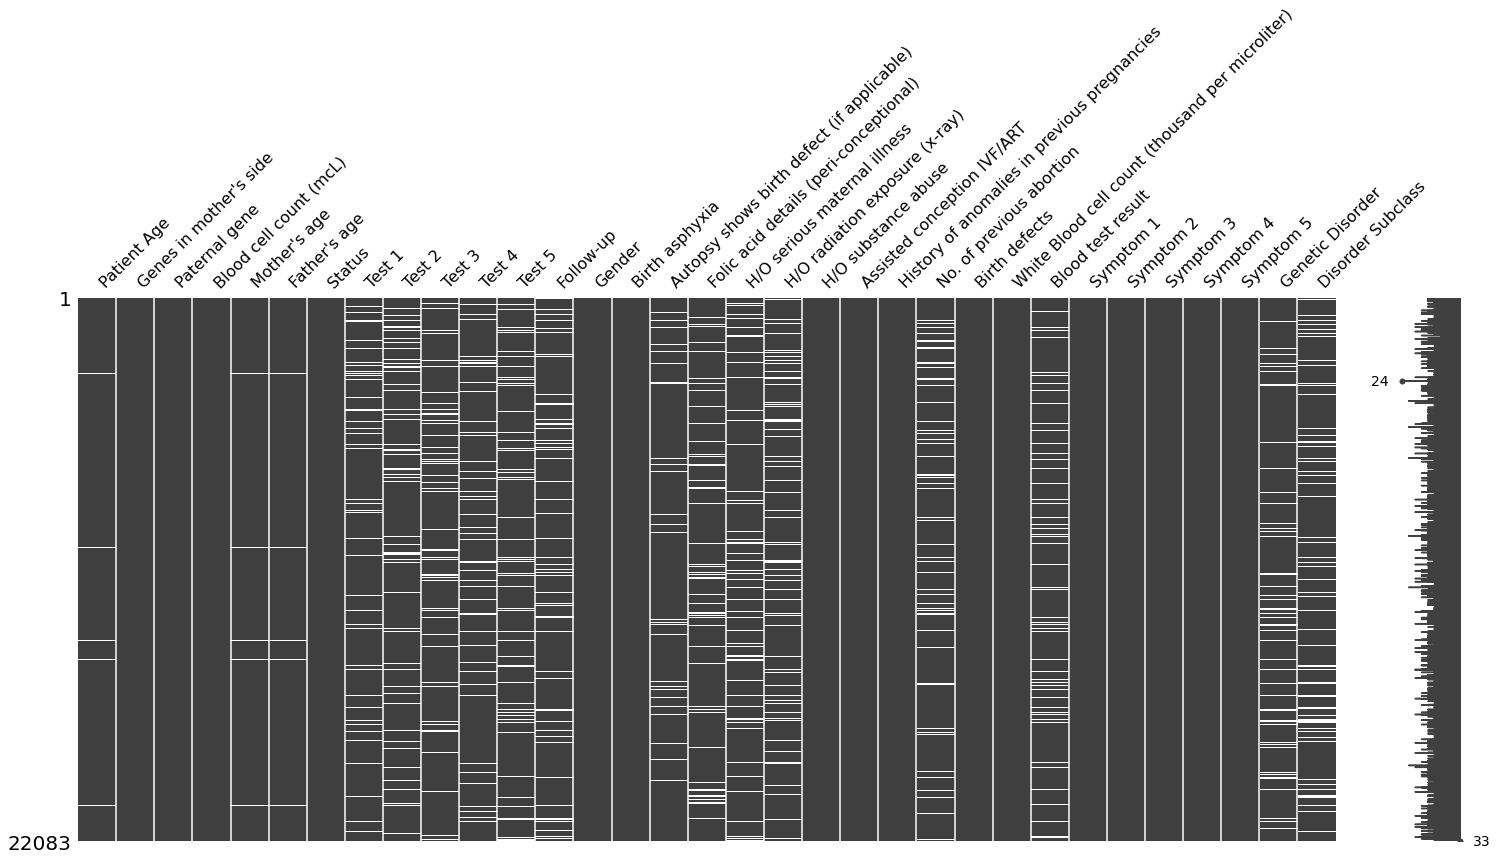

In [79]:
ms.matrix(train)

In [80]:
train['Blood test result'].value_counts()

slightly abnormal    5128
normal               4954
inconclusive         4952
abnormal             4904
Name: Blood test result, dtype: int64

In [81]:
test['Blood test result'].value_counts()

-99                  2080
abnormal             1881
slightly abnormal    1871
normal               1829
inconclusive         1804
Name: Blood test result, dtype: int64

In [82]:
def bloodtest(x):
    if(x=='normal'):
        return 1
    elif(x=='abnormal'):
        return 0
    elif(x=='slightly abnormal'):
        return 2
    else:
        return 3

In [83]:
train['Blood test result'] = train['Blood test result'].map(bloodtest)
test['Blood test result'] = test['Blood test result'].map(bloodtest)

<AxesSubplot:>

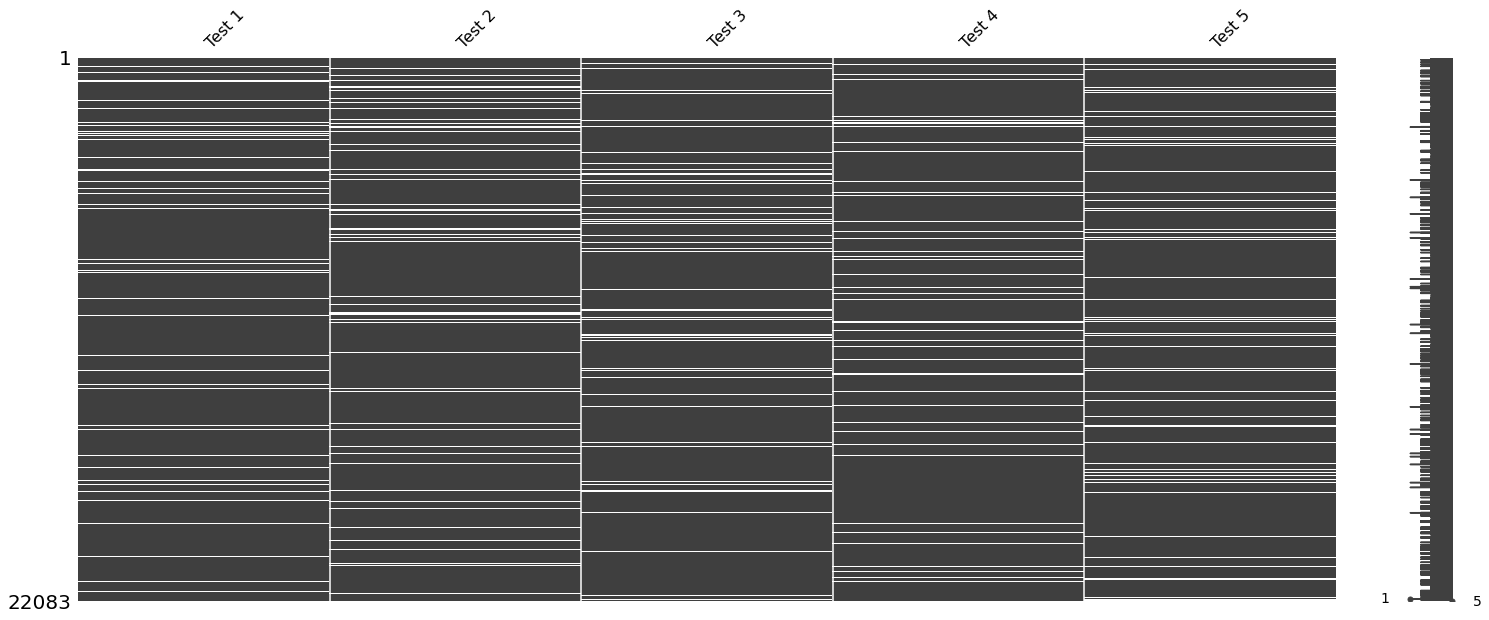

In [84]:
ms.matrix(train[['Test 1','Test 2','Test 3','Test 4','Test 5']])

In [85]:
train.drop(['Test 1','Test 2','Test 3','Test 4','Test 5'],axis=1,inplace=True)
test.drop(['Test 1','Test 2','Test 3','Test 4','Test 5'],axis=1,inplace=True)

In [86]:
train['H/O serious maternal illness'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [87]:
test['H/O serious maternal illness'].unique()

array(['No', 'Yes', '-99'], dtype=object)

In [88]:
def onezero(x):
    return 1 if x=='Yes' else 0

In [89]:
train['H/O serious maternal illness']=train['H/O serious maternal illness'].map(onezero)
test['H/O serious maternal illness'] = test['H/O serious maternal illness'].map(onezero)

In [90]:
train.dropna(axis=0,inplace=True)

In [91]:
train['Genetic Disorder'].unique()

array(['Multifactorial genetic inheritance disorders',
       'Mitochondrial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [92]:
train['Disorder Subclass'].unique()

array(['Diabetes', 'Leigh syndrome', 'Cancer', 'Cystic fibrosis',
       'Tay-Sachs', 'Hemochromatosis', 'Mitochondrial myopathy',
       "Leber's hereditary optic neuropathy", "Alzheimer's"], dtype=object)

In [93]:
x= range(0,9)

In [94]:
disorder = {"class":train['Disorder Subclass'].unique(),"codes":x}
pd.DataFrame(disorder)

,class,codes
0,Diabetes,0
1,Leigh syndrome,1
2,Cancer,2
3,Cystic fibrosis,3
4,Tay-Sachs,4
5,Hemochromatosis,5
6,Mitochondrial myopathy,6
7,Leber's hereditary optic neuropathy,7
8,Alzheimer's,8


In [95]:
def subclass(x):
    cnt = 0
    for i in train['Disorder Subclass'].unique():
        if(x==i):
            return cnt
        cnt+=1
train['subclass'] = train['Disorder Subclass'].map(subclass)

In [96]:
train['Genetic Disorder'].unique()

array(['Multifactorial genetic inheritance disorders',
       'Mitochondrial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [97]:
genetic = {"disorder":train['Genetic Disorder'].unique(),"codes":range(0,3)}
pd.DataFrame(genetic)

,disorder,codes
0,Multifactorial genetic inheritance disorders,0
1,Mitochondrial genetic inheritance disorders,1
2,Single-gene inheritance diseases,2


In [98]:
def genome(x):
    cnt = 0
    for i in train['Genetic Disorder'].unique():
        if(x==i):
            return cnt
        cnt+=1
train['genome'] = train['Genetic Disorder'].map(genome)

In [99]:
train.head()

,Patient Age,Genes in mother's side,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,subclass,genome
2,6.0,1,0,4.893297,41.0,22.0,1,0.0,2,2,2.0,1.0,0,1.0,2,1,1,4.0,0,7.750000,1,False,True,True,True,True,Multifactorial genetic inheritance disorders,Diabetes,0,0
3,12.0,1,0,4.705280,21.0,42.0,0,1.0,0,2,0.0,0.0,1,2.0,2,2,1,1.0,0,7.919321,3,False,False,True,False,False,Mitochondrial genetic inheritance disorders,Leigh syndrome,1,1
4,11.0,1,1,4.720703,32.0,42.0,1,0.0,0,2,2.0,0.0,1,2.0,2,1,0,4.0,1,4.098210,3,False,False,False,False,True,Multifactorial genetic inheritance disorders,Cancer,2,0
5,14.0,1,0,5.103188,35.0,41.0,0,0.0,1,2,2.0,0.0,0,0.0,0,2,0,0.0,1,10.272230,1,True,False,False,True,False,Single-gene inheritance diseases,Cystic fibrosis,3,2
7,3.0,0,1,4.964816,40.0,41.0,1,0.0,2,2,2.0,1.0,1,0.0,2,0,1,1.0,0,9.836352,3,False,False,True,True,False,Single-gene inheritance diseases,Tay-Sachs,4,2


In [100]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

2021-08-09 15:38:35.880175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-09 15:38:35.880200: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [101]:
model = Sequential()
model.add(Dense(5,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(9))

2021-08-09 15:38:37.239041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-09 15:38:37.239071: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-09 15:38:37.239092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shaury-HP-250-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2021-08-09 15:38:37.239397: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [102]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [103]:
xtrain = train.drop(['Genetic Disorder','genome','Disorder Subclass','subclass'],axis=1)
ytrain = train['subclass']

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)

In [105]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)

In [106]:
train['subclass'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [107]:
ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [109]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accuracy: 0.2586
Epoch 10/10
392/392 [==============================] - 1s 2ms/step - loss: 11.5780 - accura

In [110]:
model.evaluate(xtrain,ytrain)

392/392 [==============================] - 1s 1ms/step - loss: 11.5780 - accuracy: 0.2586


[11.577978134155273, 0.25861793756484985]

In [115]:
prd = model.predict_classes(xtrain)
prd = {"prd":prd}
prd

{'prd': array([1, 1, 1, ..., 1, 1, 1])}

In [121]:
train['subclass']

2        0
3        1
4        2
5        3
7        4
        ..
22072    6
22074    5
22076    1
22079    0
22082    0
Name: subclass, Length: 12532, dtype: int64

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pd.DataFrame(prd),train['subclass'])

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1130, 3241,   59, 2207, 1812,  827, 2760,  405,   91],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
xtrain = train.drop(['Genetic Disorder','genome','Disorder Subclass'],axis=1)
ytrain = train['genome']

In [ ]:
model2 = Sequential()
model2.add(Dense(5,activation='softmax'))
model2.add(Dense(5,activation='softmax'))
model2.add(Dense(5,activation='softmax'))
model2.add(Dense(5,activation='softmax'))
model2.add(Dense(3))

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)

In [ ]:
ytrain = to_categorical(ytrain)

In [ ]:
model2.fit(xtrain,ytrain,epochs=150)

In [ ]:
test.fillna(0,inplace=True)

In [ ]:
scaler.fit(test)
xtest = scaler.transform(test)

# using the XBClassifier

from xgboost import XGBClassifier
model1 = XGBClassifier()

model1.fit(train.drop(['Genetic Disorder','genome','Disorder Subclass','subclass'],axis=1),train['subclass'])

subclasstest = model1.predict(test)

test['subclass'] = subclasstest

def returnbackclass(x):
    return disorder['class'][x]
test['Disorder Subclass']=test['subclass'].map(returnbackclass)

test.head()

model2 = XGBClassifier()

model2.fit(train.drop(['Genetic Disorder','genome','Disorder Subclass'],axis=1),train['Genetic Disorder'])

final = model2.predict(test.drop('Disorder Subclass',axis=1))

test['Genetic disorder'] = final

test.head()

last = pd.read_csv('/home/shaury/Desktop/pvsc/genome-hackerearth/dataset/test.csv')

last.head()

findict = {"Patient Id":last['Patient Id'],"Genetic Disorder":final,"Disorder Subclass":test['Disorder Subclass']}

pd.DataFrame(findict).to_csv('/home/shaury/ans.csv')

# using the random forest model 

test = test.drop(['Genetic disorder','Disorder Subclass','subclass'],axis=1)

test.fillna(0,inplace=True)

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

model3.fit(train.drop(['Genetic Disorder','genome','Disorder Subclass','subclass'],axis=1),train['subclass'])

subclasstest = model3.predict(test)

test['subclass'] = subclasstest

test['Disorder Subclass']=test['subclass'].map(returnbackclass)

test.head()

model4 = RandomForestClassifier()

model4.fit(train.drop(['Genetic Disorder','genome','Disorder Subclass'],axis=1),train['Genetic Disorder'])

final = model4.predict(test.drop('Disorder Subclass',axis=1))

test['Genetic disorder'] = final

findict = {"Patient Id":last['Patient Id'],"Genetic Disorder":final,"Disorder Subclass":test['Disorder Subclass']}

pd.DataFrame(findict).to_csv('/home/shaury/ansrfc.csv')

# rfc performed better